# NumPy Ndarray
---

NumPy（Numerical Python）是 Python 语言的一个扩展程序库，支持大量的维度数组与矩阵运算，此外也针对数组运算提供大量的数学函数库。

NumPy 的前身 Numeric 最早是由 Jim Hugunin 与其它协作者共同开发，2005 年，Travis Oliphant 在 Numeric 中结合了另一个同性质的程序库 Numarray 的特色，并加入了其它扩展而开发了 NumPy。NumPy 为开放源代码，并且由许多协作者共同维护开发。

NumPy 是一个运行速度非常快的数学库，主要用于数组计算，包含：

- 一个强大的 N 维数组对象 Ndarray
- 广播功能函数
- 整合 C/C++/Fortran 代码的工具
- 线性代数、傅里叶变换、随机数生成等功能

#### 课程内容

1. Ndarray 创建
2. Ndarray 基本属性
3. Ndarray 索引和切片
4. Ndarray 修改结构
5. Ndarray 向量化操作
6. 广播（Broadcast）

---
### 1. Ndarray 创建

#### 1.1 np.array() 函数

`np.array()` 函数可以将其他类似数列的对象转成 Ndarray 对象。

In [ ]:
import numpy as np                                     # 导入 numpy 惯例

将列表、元组转为 Ndarray

In [ ]:
close = np.array([10, 10.5, 11.0, 11.5, 12])           # list 转化为 ndarray

In [ ]:
close                                                  # 整数自动转为浮点数，ndarray元素数据类型相同

In [ ]:
type(close)

In [ ]:
for i in close:
    print(type(i))

In [ ]:
stock_info = np.array(('000001', '平安银行', '银行', 10.20))      # tuple 转为 ndarray   

In [ ]:
stock_info                                                       # 浮点数自动转为字符串

In [ ]:
for i in stock_info:
    print(type(i))

通过嵌套列表/元组可以创建多维数组

In [ ]:
np.array([[2,3], [3,4]])

和列表、元组等不同，Ndarray 元素必须是同一数据类型。

In [ ]:
close = np.array([10, 10.5, 11.0, 11.5, 12])
close

In [ ]:
close[0] = 'python'                 # 报错，Ndarray中元素的数据类型必须相同，为了做向量化

In [ ]:
close_list = [10, 10.5, 11.0, 11.5, 12]

In [ ]:
close_list[0] = 'Python'           # list中元素的数据类型可以不同

In [ ]:
close_list

#### 1.2 np.arange() 函数

`np.arange()` 函数可以生成等距数组。

In [ ]:
np.arange(5) 

In [ ]:
np.array(range(5))               # 等同于 np.arange(5)

In [ ]:
np.arange(5,10,2)                # 起始，结束，步长

#### 1.3 np.linspace() 函数

`np.linspace()` 函数可以生成等距数组，和 `np.arange()` 不同的是，`np.linspace()` 区间为双闭区间。

In [ ]:
np.linspace(5, 15, 11)           # 双闭区间，11 个数

In [ ]:
np.linspace(0, 1)                # 默认分成 50 个数

#### 1.4 np.zeros()/ones()/empty()

In [ ]:
np.zeros(5)                     # 生成全部为 0 的数组

In [ ]:
np.zeros((2, 1))                # 形状参数用列表或元组都可以

In [ ]:
np.ones(5)

In [ ]:
np.empty((2, 2))                # 不设初始值，速度比 zeros 更快，但谨慎使用

#### 1.5 np.zeros_like()/ones_like()

In [ ]:
arr = np.array([[2,3],[3,4]])
arr

In [ ]:
np.zeros_like(arr)

In [ ]:
np.ones_like(arr)

---
### 2. Ndarray 基本属性

.ndim 维度

.shape 每个维度的长度

.size 整个数组的长度，等于各个维度长度之积

.dtype 内部数据的类型

.itemsize 每个元素的字节长度

.nbytes 整个数组的字节长度，等于 .itemsize * .size

In [ ]:
# 一维 ndarray
close = np.array([10, 10.5, 11.0, 11.5, 12])

In [ ]:
close.ndim

In [ ]:
close.shape

In [ ]:
close.size

In [ ]:
close.dtype

In [ ]:
# 多维 ndarray
open_list = [10, 11, 12, 13, 14]
close_list = [12, 11, 10, 14, 16]

In [ ]:
stock_info_list = [open_list, close_list]
stock_info_list

In [ ]:
stock_info = np.array(stock_info_list)
stock_info

In [ ]:
# 查看多维数组的各个属性
print('ndim: ' , stock_info.ndim)
print('shape: ', stock_info.shape)
print('size: ' , stock_info.size)
print('dtype: ', stock_info.dtype)

---
### 3. Ndarray 索引和切片

#### 3.1 一维 Ndarray 进行索引和切片

In [ ]:
close = np.array([10, 10.5, 11.0, 11.5, 12])

In [ ]:
close[0]        # 取出第一天收盘价

In [ ]:
close[-1]       # 取出最后一天收盘价
# ndarray索引与list类似

In [ ]:
close[-2:]      # 取出最后两天收盘价
# ndarray切片与list类似

In [ ]:
lst = [10, 10.5, 11.0, 11.5, 12]
lst[1:5:2]

In [ ]:
close[1:5:2]    # 取出第二天和第四天的收盘价，从索引 1 开始到索引 5 结束，索引 5 取不到，步长是 2

#### 3.2 多维 Ndarray 进行索引和切片

In [ ]:
volume_stock1 = [10, 20, 10, 15, 20]
volume_stock2 = [25, 75, 10, 15, 100] 
volume_stock3 = [55, 35, 10, 20, 20] 

In [ ]:
volume_matrix = np.array([volume_stock1, volume_stock2, volume_stock3])
volume_matrix                      # 3支股票近5天的交易量

In [ ]:
volume_matrix[0]                   # 第一行, 第一支股票近五天交易量

In [ ]:
volume_matrix[0][2]

In [ ]:
volume_matrix[0, 2]                # 第一行第三个元素， 第一支股票第三天交易量

In [ ]:
volume_matrix[1, 1]

In [ ]:
volume_matrix[:, -1]               # 所有股票最后一天的交易量

In [ ]:
volume_matrix[:2, -1]  

In [ ]:
volume_matrix[:, :2]              # 所有股票前两天的交易量

In [ ]:
volume_matrix[:, ::2]             # 所有股票，第一、三、五日的交易量

In [ ]:
volume_matrix[:, [0,1,4]]         # 所有股票，各个交易日的交易量，灵活的选择

#### 3.3 布尔索引

In [ ]:
#布尔取值；这个是在条件选股非常常用；
code_array = np.array(['000001', '000002', '000003', '000004'])
pe_array = np.array([20, 10, 5, 30])
# 部分数据源返回数据形式与以上代码类似，在code_array中记载股票代码，在pe_array中记载pe值，两个array数据一一对应
# 如 ‘000001’ 股票对应 pe 值为 20

In [ ]:
# 下行代码通过 <= 符号判断生成 bool 值组成的 ndarray，如果元素对应的值符合条件，则对应返回True，否则为False
filtered_array = pe_array <= 10
filtered_array

In [ ]:
code_array[filtered_array]    # 返回 filtered_array 对应为 True 的股票代码

In [ ]:
# 以上过程可简写
code_array[pe_array<=10]

In [ ]:
# 多个条件，条件选股；
roe_array = np.array([0.05, -0.10, 0.12, 0.15])

In [ ]:
# 使用双重条件，选择pe值<=10同时roe>=0的股票
# 注意，此时单个条件需要用括号括起来
filtered_array = (pe_array<=10) & (roe_array>=0)
filtered_array

In [ ]:
code_array[filtered_array]

In [ ]:
# 以上过程可简写
code_array[(pe_array<=10) & (roe_array>=0)]

In [ ]:
# 选取并集，选择pe值小于等于10或roe大于等于0的股票
# 此时用|表示或
code_array[(pe_array<=10) | (roe_array>=0)]

---
### 4. Ndarray 修改结构

#### 4.1 reshape

`reshape()` 方法可以改变数组的形状，但是不可以改变数组的大小。

以返回值形式，原数组没有发生改变。

In [ ]:
g = np.arange(10)
g

In [ ]:
g.shape

In [ ]:
g = g.reshape(2,5)          # 以返回值形式，原来数组没有改变

In [ ]:
g

In [ ]:
g.reshape(2,3)          # 报错，不可以改变数组大小

#### 4.2 resize

`resize()` 方法可以改变数组的形状或大小。

没有返回值，直接修改原数组。

In [ ]:
g = np.arange(10)
g

In [ ]:
g.resize(2,5)                      # 没有返回值，直接对原数组进行修改

In [ ]:
g

In [ ]:
g = np.arange(10)
g.resize(2,3)                     # 可以改变数组形状和大小

In [ ]:
g

`np.resize()` 函数也可以改变数组的形状或大小。

和 Ndarray 的 `resize()` 方法不同的是，该函数将修改后的数组以返回值形式返回，原数组没有发生改变。

In [ ]:
g = np.arange(10)
np.resize(g, (2,3))               # np.resize 函数也可以起到类似效果，但是是以返回值的形式

In [ ]:
g

#### 4.3 flatten

`flatten()` 方法可以将数组拉平为一维数组。

以返回值形式，原数组没有发生改变。

In [ ]:
h = np.arange(12).reshape(3,4)
h

In [ ]:
h.flatten()

In [ ]:
h

#### 4.4 transpose

`transpose()` 方法可以将数组进行转置。

以返回值形式，原数组没有发生改变。

In [ ]:
h = np.arange(12).reshape(3,4)
h

In [ ]:
h.transpose()    # 将数组进行转置

In [ ]:
h.T              # Ndarray 的属性 T 也可以获得数组的转置

---
### 5. Ndarray 向量化操作

Ndarray 可以批量处理数据而不需要写任何 for 循环，即向量化操作。

Python 内置数据类型 List 对比

In [ ]:
return_list = [0.01, 0.12, 0.3, 0.06, -0.05]               # 来自持股stock1的每日收入情况
leverage_list = [2, 1.5, 2, 1.8, 2.2]                      # 每日杠杆比例

In [ ]:
return_list + return_list                                  # 列表加法为列表的拼接

In [ ]:
return_list * 3                                           # 列表乘法为列表的重复

In [ ]:
# return_list * leverage_list                                # 报错，不可以进行列表之间的乘法

In [ ]:
actual_return = []
for i in range(len(return_list)):
    actual_return.append(return_list[i]*leverage_list[i])
actual_return

In [ ]:
[return_list[i]*leverage_list[i] for i in range(len(return_list))]

NumPy Ndarray 向量化计算

In [ ]:
return_array = np.array(return_list)                       # 来自持股stock1的每日收入情况
leverage_array = np.array(leverage_list)                   # 每日杠杆比例

In [ ]:
return_array, leverage_array

In [ ]:
return_array + return_array                                # 向量化，元素级别的计算

In [ ]:
return_array * leverage_array

In [ ]:
return_array * 2                                           # 广播机制，向量化计算

In [ ]:
[i * 2 for i in return_list]                               # 列表需要使用 for 循环

代码性能对比

In [ ]:
data_array = np.random.standard_normal(1000000)            # 向量化可以有效提升代码性能
data_array

In [ ]:
data_list = list(data_array)

In [ ]:
%timeit [i*2 for i in data_list]                           # Python尽可能规避使用循环

In [ ]:
%timeit 2 * data_array

---
### 6. 广播（Broadcast）

广播（Broadcast）是 NumPy 对不同形状的数组进行数值计算的方式。

如果两个数组 a 和 b 形状相同，即满足 a.shape == b.shape，那么 a * b 的结果就是 a 与 b 数组对应位相乘，即向量化操作。

当运算中的 2 个数组的形状不同时，NumPy 将自动触发广播机制。

In [ ]:
a = np.array([[ 0, 0, 0],
              [10,10,10],
              [20,20,20],
              [30,30,30]])
b = np.array([0,1,2])

In [ ]:
a + b                                            # 自动将 b 按照 a 的形状补齐

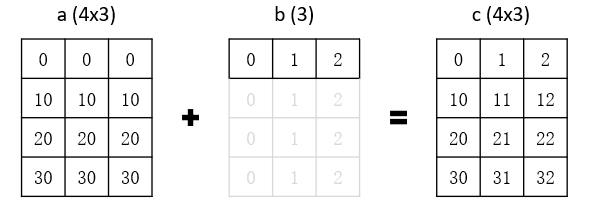

In [ ]:
b2 = np.array([0,1])                             # 不是所有形状都可以进行广播
a + b2

例：因子标准化

In [ ]:
stock_pe = np.array([[15,16,15,17,16],            # 假设为不同行业不同股票的pe
                     [50,53,57,56,58],
                     [20,18,19,17,15]])

In [ ]:
pe_average = np.average(stock_pe)                 # 也可以使用 Ndarray 的 mean() 方法
pe_average

In [ ]:
stock_pe.mean()

In [ ]:
pe_std = np.std(stock_pe)
pe_std

In [ ]:
stock_pe.std()                                    # 也可以使用 Ndarray 的 std() 方法

In [ ]:
pe_standardized = (stock_pe - pe_average)/pe_std        # 标准化 pe
pe_standardized

In [ ]:
# 标准化步骤分解 1
data1 = stock_pe - pe_average                           # 广播 1
data1

In [ ]:
# 标准化步骤分解 2
data1 / pe_std                                         # 广播 2

In [ ]:
def standardize(factor):
    return (factor - factor.mean())/factor.std()

In [ ]:
standardize(stock_pe)

声明：本资料仅限内部研究和交流使用，切勿外传。